To open notebook in Colab please click below:

<a href="https://colab.research.google.com/github/bwolfson2/foster_in_dev/blob/master/Homeworks/HW%202.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>'

In [43]:
#If opening in colab run this cell
!git clone https://github.com/bwolfson2/foster_in_dev
%cd foster_in_dev/Homeworks/

Cloning into 'foster_in_dev'...
remote: Enumerating objects: 978, done.
remote: Counting objects: 100% (249/249), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 978 (delta 103), reused 174 (delta 68), pack-reused 729
Receiving objects: 100% (978/978), 274.58 MiB | 29.50 MiB/s, done.
Resolving deltas: 100% (429/429), done.
Checking out files: 100% (89/89), done.
/content/foster_in_dev/Homeworks/foster_in_dev/Homeworks


# Part II: Predicting Show-Up

The purpose of this part of the homework is to get you up to speed with data manipulation and model fitting using Python. Ideally, you should be able to start working on your term project after finishing this.

### Background

You've been hired as the manager of Sacred Heart Medical Clinic (SHMC). As part of its business model, SHMC usually employs doctors on demand, meaning that doctors are asked to come only when there are appointments. However, once a doctor has been asked to come, you must pay him or her regardless of whether the patient shows up or not. You want to use data on previous appointments to figure out whether you can predict which patients are going to show up, so that you can plan better how many doctors to call.

In [44]:
import pandas as pd

# Path to the data containing past appointments (Remember to change this to the specific path of your data).
data_path = "/content/foster_in_dev/Homeworks/data/data-hw2.csv" 

### Loading the data

** 1. Load the data referenced by the path above into a pandas data frame. Print the total number of rows and show the first few rows in the dataset. ** 

In [45]:
# Put your answer here
df = pd.read_csv(data_path)

df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [46]:
df['PatientId'].count()

110527

Here's a brief summary of the variables you should see:

1. PatientId - Identification of a patient.
2. AppointmentID - Identification of each appointment.
3. Gender - Male or female. 
4. ScheduledDay - The day someone called or registered the appointment.
6. AppointmentDay - The day of the actual appointment, when the patient has to visit the doctor. 
7. Age = How old is the patient. 
8. Neighborhood - Place where the patient lives. 
9. Scholarship - Whether the patient receives financial help.
10. Hypertension - Whether the patient suffers from hypertension.
11. Diabetes - Whether the patient suffers from diabetes.
12. Alcoholism - Whether the patient suffers from alcoholism.
13. Handicap - Whether the patient is handicapped.
14. SMS_received - Whether 1 or more SMS messages were sent to the patient
15. No-show - Whether the patient missed the appointment.

** 2. Check out if there are any Na or NaN values. Drop all the observations that include such values in any of the columns. ** 

In [47]:
# Put your answer here
df.isnull().values
df.dropna()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


### Dealing with dates

** 3. Transform ScheduledDay and AppointmentDay into datetimes (Hint: Use pandas for this). **

In [48]:
# Put your answer here
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

** 4. If you take a look at both dates, you will see that ScheduledDay includes a specific time with the date, but AppointmentDay doesn't. In order to compare both fields more easily, "normalize" ScheduledDay (i.e., keep only the dates). Hint: See the [normalize](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.normalize.html) method. **

In [49]:
# Put your answer here
df['ScheduledDay'] = pd.DatetimeIndex(df['ScheduledDay']).normalize()

In [50]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


** 5. Create a new column called 'TimeInAdvance' for the difference in days between ScheduledDay and AppointmentDay. Make sure that the new field includes only integers (and not TimeDelta, which is the difference between two datetimes).**

In [51]:
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighborhood                   object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No-show                        object
dtype: object

In [52]:
# Put your answer here
df['TimeInAdvance'] = df['AppointmentDay'] - df['ScheduledDay']

df['TimeInAdvance'] = df['TimeInAdvance'].dt.days.astype('int16')

There are many other features you may want to extract from date variables, such as the time at which the appointment was schedule, the day of the week, the month, etc. However, we will only use TimeInAdvance for the purposes of this homework.

### Cleaning data

**6. Use the "describe" command from pandas to obtain some general stats about the data (in case you forgot about it, take a look at the 'Dealing with data' notebook in Module 1). Do you see any weird values in any of the columns? Remove all observations that include "weird" or wrong values and comment on why did you remove such observations. Also, print the number of observations you removed. **

In [53]:
# Put your answer here
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


In [54]:
# Eliminate negative ages
df.drop(df[df['Age'] < 0].index, inplace = True)

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,10.183794
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,15.255034
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172538e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.438960e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


In [55]:
# Eliminate Handicap > 1
df.drop(df[df['Handicap'] > 1].index, inplace = True)

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182,10.186971
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932,15.257836
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.174580e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175390e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439380e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [56]:
# TimeInAdvance: no negative values
df.drop(df[pd.to_numeric(df['TimeInAdvance']) < 0].index, inplace = True)

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance
count,1.103220e+05,1.103220e+05,110322.00000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000
mean,1.475217e+14,5.675297e+06,37.07092,0.098285,0.196842,0.071609,0.030384,0.018491,0.321196,10.187524
std,2.561305e+14,7.130031e+04,23.09791,0.297701,0.397614,0.257840,0.171642,0.134720,0.466938,15.257955
min,3.920000e+04,5.030230e+06,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174510e+12,5.640275e+06,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175390e+13,5.680568e+06,37.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439380e+13,5.725513e+06,55.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999820e+14,5.790484e+06,115.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


### Dealing with binary variables

** 7. Create a new column called "IsFemale" that is 1 if the patient is female and 0 otherwise. Hint: Take a look at the [where](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.where.html) method. Make sure to also drop the Gender column.  **

In [57]:
# Put your answer here
import numpy as np

In [58]:
df['IsFemale'] = np.where(df['Gender'] == 'M', 0, 1)

In [59]:
df.drop(columns=['Gender'],inplace=True)
df.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1


** 8. Do the same for the No-show variable. It should be 1 if the person didn't show and 0 otherwise. **

In [60]:
# Put your answer here
df['No-show'] = np.where(df['No-show'] == 'No', 1, 0)

### Dealing with categorical variables

** 9. Let's take a look at the Neighbordhood column. How many unique neighborhoods are there? Which are the 5 most common neighborhoods? Which are the 5 least common ones?  ** 

In [61]:
# Put your answer here
df['Neighborhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4419
JARDIM DA PENHA                3872
ITARARÉ                        3507
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighborhood, Length: 81, dtype: int64

** 10. (Optional, extra points) We often group together categories that are very rare because it's hard to genearlize from them. Find the neighborhoods that appear less than 500 times in the dataset and replace their name with "OTHER". **

In [62]:
# Put your (optional) answer here
count_n = pd.DataFrame(df['Neighborhood'].value_counts())
less_500 = count_n.where(count_n['Neighborhood'] < 500)
less_500_clean = less_500.reset_index().dropna()
less_500_clean

,index,Neighborhood
54,SOLON BORGES,469.0
55,PIEDADE,452.0
56,SANTA CECÍLIA,448.0
57,SANTA LÚCIA,437.0
58,BARRO VERMELHO,423.0
59,SANTA LUÍZA,422.0
60,DO MOSCOSO,411.0
61,MÁRIO CYPRESTE,371.0
62,BOA VISTA,312.0
63,COMDUSA,310.0


In [63]:
merge = df.merge(less_500_clean['index'], left_on='Neighborhood', right_on='index', how='left')
merge.loc[merge['index'].notnull(), "Neighborhood"] = "OTHER"
merge

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale,index
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,1,NaN
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,0,NaN
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,1,NaN
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,OTHER,0,0,0,0,0,0,1,0,1,PONTAL DE CAMBURI
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110317,2.572130e+12,5651768,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,1,35,1,NaN
110318,3.596270e+12,5650093,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,1,35,1,NaN
110319,1.557660e+13,5630692,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,1,41,1,NaN
110320,9.213490e+13,5630323,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,1,41,1,NaN


In [64]:
merge.drop(columns='index', inplace=True)
merge

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,1
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,1
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,OTHER,0,0,0,0,0,0,1,0,1
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110317,2.572130e+12,5651768,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,1,35,1
110318,3.596270e+12,5650093,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,1,35,1
110319,1.557660e+13,5630692,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,1,41,1
110320,9.213490e+13,5630323,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,1,41,1


** 11. Get dummy/indicator variables for each neighborhood and add them to the dataframe. Hint: Take a look at the [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) method. Make sure to also drop the Neighborhood column. **

In [65]:
# Put your answer here
neigh_dummy = pd.get_dummies(merge['Neighborhood'])

In [66]:
df_combine = merge.join(neigh_dummy)
df_combine

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale,ANDORINHAS,BELA VISTA,BENTO FERREIRA,BONFIM,CARATOÍRA,CENTRO,CONQUISTA,CONSOLAÇÃO,CRUZAMENTO,DA PENHA,DO CABRAL,DO QUADRO,ESTRELINHA,FONTE GRANDE,FORTE SÃO JOÃO,GOIABEIRAS,GRANDE VITÓRIA,GURIGICA,ILHA DAS CAIEIRAS,ILHA DE SANTA MARIA,ILHA DO PRÍNCIPE,INHANGUETÁ,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,JOANA D´ARC,JUCUTUQUARA,MARIA ORTIZ,MARUÍPE,MATA DA PRAIA,MONTE BELO,NOVA PALESTINA,OTHER,PARQUE MOSCOSO,PRAIA DO CANTO,PRAIA DO SUÁ,REDENÇÃO,REPÚBLICA,RESISTÊNCIA,ROMÃO,SANTA CLARA,SANTA MARTHA,SANTA TEREZA,SANTO ANDRÉ,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,VILA RUBIM
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,OTHER,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110317,2.572130e+12,5651768,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,1,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110318,3.596270e+12,5650093,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,1,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110319,1.557660e+13,5630692,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,1,41,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110320,9.213490e+13,5630323,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,1,41,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
df_2 = df_combine.drop(columns='Neighborhood')
df_2

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale,ANDORINHAS,BELA VISTA,BENTO FERREIRA,BONFIM,CARATOÍRA,CENTRO,CONQUISTA,CONSOLAÇÃO,CRUZAMENTO,DA PENHA,DO CABRAL,DO QUADRO,ESTRELINHA,FONTE GRANDE,FORTE SÃO JOÃO,GOIABEIRAS,GRANDE VITÓRIA,GURIGICA,ILHA DAS CAIEIRAS,ILHA DE SANTA MARIA,ILHA DO PRÍNCIPE,INHANGUETÁ,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,JOANA D´ARC,JUCUTUQUARA,MARIA ORTIZ,MARUÍPE,MATA DA PRAIA,MONTE BELO,NOVA PALESTINA,OTHER,PARQUE MOSCOSO,PRAIA DO CANTO,PRAIA DO SUÁ,REDENÇÃO,REPÚBLICA,RESISTÊNCIA,ROMÃO,SANTA CLARA,SANTA MARTHA,SANTA TEREZA,SANTO ANDRÉ,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,VILA RUBIM
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110317,2.572130e+12,5651768,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,0,0,0,0,0,1,1,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110318,3.596270e+12,5650093,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,0,0,0,0,0,1,1,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110319,1.557660e+13,5630692,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,0,0,0,0,0,1,1,41,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110320,9.213490e+13,5630323,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,0,0,0,0,0,1,1,41,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Dealing with panel data

** 12. Let's take a look at the PatientsId column. How many patients have made more than one appointment?  **

In [68]:
# Put your answer here
count_id = pd.DataFrame(df_2['PatientId'].value_counts())
count_id.where(count_id['PatientId'] > 1).value_counts().sum()

24448

As you can see, there are many patients that have made more than one appointment. Panel data (also called longitudinal data) contain observations for the same individuals over multiple periods of time. In our particuclar case, such data may help us to make better predictions. For example, the fact that a patient has failed to show up in the past may be predictive of the patient not showing up in the future. That being said, taking advantage of panel data often requires additional data processing. The following exercise is **optional** and relatively advanced, so feel free to ignore it. 

** 13. (Optional, extra points) Create a new column called "PreviousNoShows" that for each appointment includes the number of past appointments to which the patient did not show. For example, if the person did not show to the first meeting, PreviousNoShows should be 0 for the first appointment and 1 for the second one (if there is any). Hint: Sort the dataframe by PatientID and ScheduledDay. Then, group by PatientID and compute the cumulative sum of the No-show variable. All of these things can be done using pandas. **

In [163]:
# Put your (optional) answer here

df_sort = df_2.sort_values(by=['PatientId', 'ScheduledDay'])
df_sort["PreviousNoShows"] = df_sort.groupby("PatientId")["No-show"].cumsum()
df_sort

KeyError: ignored

There are many other features we could compute with this data set, such as time between appointments, number of past appointments, fraction of appointments to which the patient did not show up, etc. However, for the purposes of this homework, we will only work with PreviousNoShows.

### Removing the unnecessary

**14. Let's drop the columns we won't be needing. Drop PatientId, AppointmentID, ScheduledDay, AppointmentDay. **

In [70]:
# Put your answer here
df_2.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], inplace=True)
df_2

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale,ANDORINHAS,BELA VISTA,BENTO FERREIRA,BONFIM,CARATOÍRA,CENTRO,CONQUISTA,CONSOLAÇÃO,CRUZAMENTO,DA PENHA,DO CABRAL,DO QUADRO,ESTRELINHA,FONTE GRANDE,FORTE SÃO JOÃO,GOIABEIRAS,GRANDE VITÓRIA,GURIGICA,ILHA DAS CAIEIRAS,ILHA DE SANTA MARIA,ILHA DO PRÍNCIPE,INHANGUETÁ,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,JOANA D´ARC,JUCUTUQUARA,MARIA ORTIZ,MARUÍPE,MATA DA PRAIA,MONTE BELO,NOVA PALESTINA,OTHER,PARQUE MOSCOSO,PRAIA DO CANTO,PRAIA DO SUÁ,REDENÇÃO,REPÚBLICA,RESISTÊNCIA,ROMÃO,SANTA CLARA,SANTA MARTHA,SANTA TEREZA,SANTO ANDRÉ,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,VILA RUBIM
0,62,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,62,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,56,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110317,56,0,0,0,0,0,1,1,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110318,51,0,0,0,0,0,1,1,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110319,21,0,0,0,0,0,1,1,41,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110320,38,0,0,0,0,0,1,1,41,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Predictive modeling

** 15. Let's build a model to predict if someone will not show up using a DecisionTreeClassifier. Report the training accuracy and the cross-validated accuracy using 5 folds. **

In [71]:
df_2['No-show'].value_counts()

1    88049
0    22273
Name: No-show, dtype: int64

In [72]:
categorical_cols = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'IsFemale']
continuous_cols = ["Age", "TimeInAdvance"]
target_col = "No-show"
predictor_cols = categorical_cols + continuous_cols

In [73]:
# Put your answer here
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=4, criterion="entropy")
decision_tree.fit(df_2[predictor_cols], df_2[target_col])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [74]:
def visualize_tree(decision_tree, feature_names, class_names, directory="/content/foster_in_dev/Homeworks/data", name="tree",proportion=True):
    # Export our decision tree to graphviz format
    dot_name = "%s/%s.dot" % (directory, name)
    dot_file = export_graphviz(decision_tree, out_file=dot_name,
                               feature_names=feature_names, class_names=class_names,proportion=proportion)
    # Call graphviz to make an image file from our decision tree
    image_name = "%s/%s.png" % (directory, name)
    os.system("dot -T png %s -o %s" % (dot_name, image_name))
    # Return the .png image so we can see it
    return Image(filename=image_name)

In [75]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import os



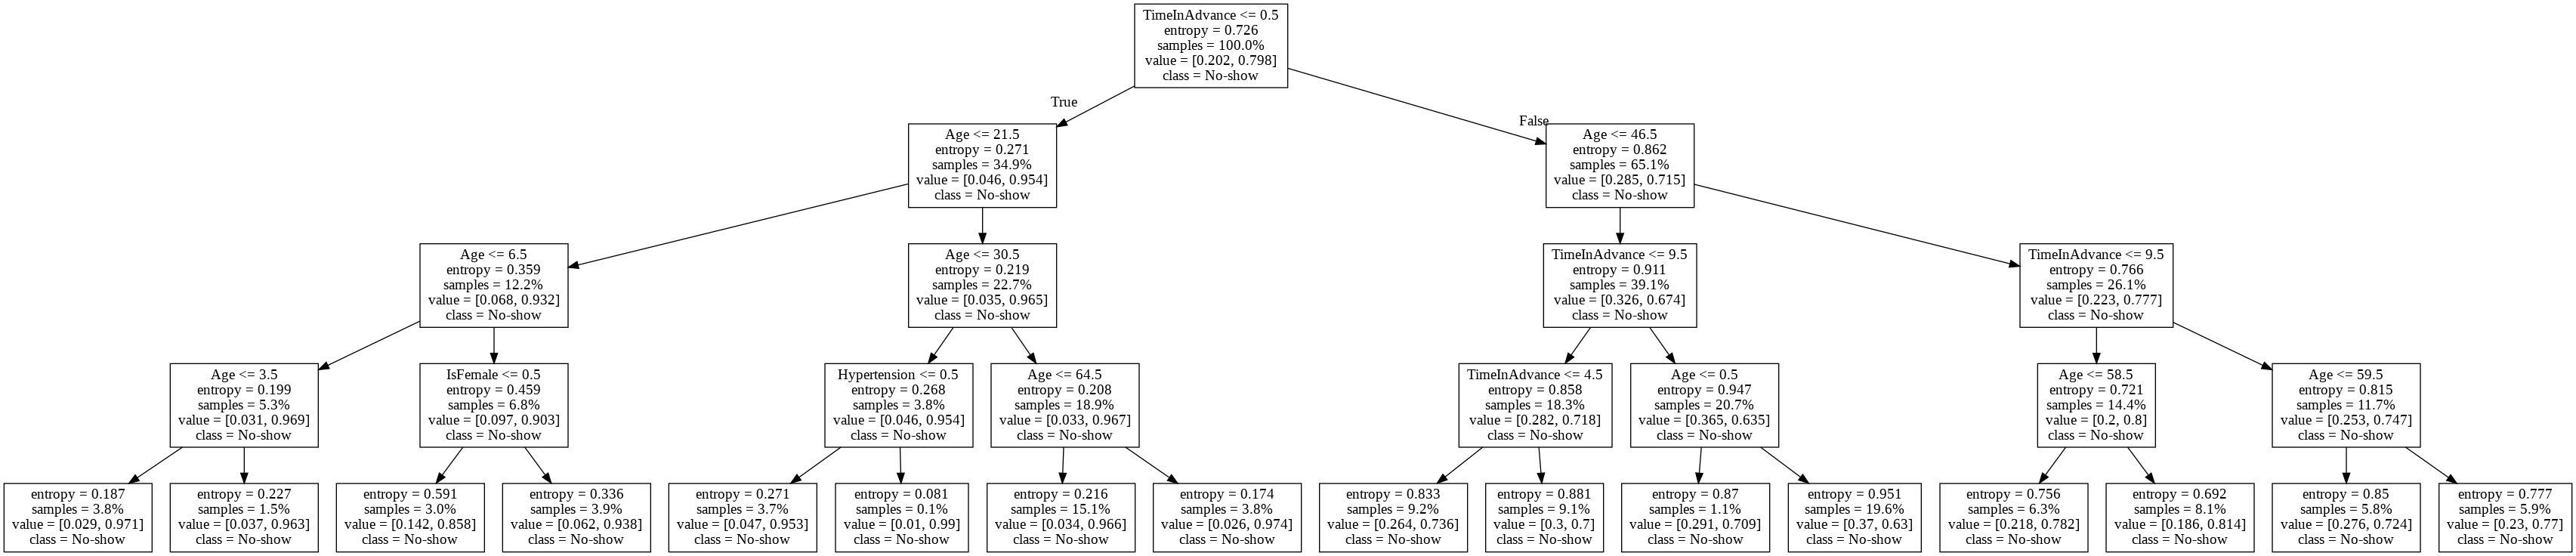

In [76]:
visualize_tree(decision_tree, predictor_cols, ["Show", "No-show"])

** 16. As discussed in class, one way to control the complexity of a decision tree is by enforcing that at least some minimum number of examples from the training set populate each leaf. This is set with the min_samples_leaf parameter. Try values for min_samples_leaf ranging from 1 to 4096 by doubling the number of samples (i.e., 1, 2, 4, 8, ..., 4096). For each value, compute the training accuracy and the cross-validated accuracy. Use the results to plot fitting curves and explain what they show. What do you think is the most appropriate value for min_samples_leaf for this problem? ** 

In [77]:
# Put your answer here
decision_tree = DecisionTreeClassifier(max_depth=4, criterion="entropy", min_samples_leaf=4096)
decision_tree.fit(df_2[predictor_cols], df_2[target_col])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4096, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

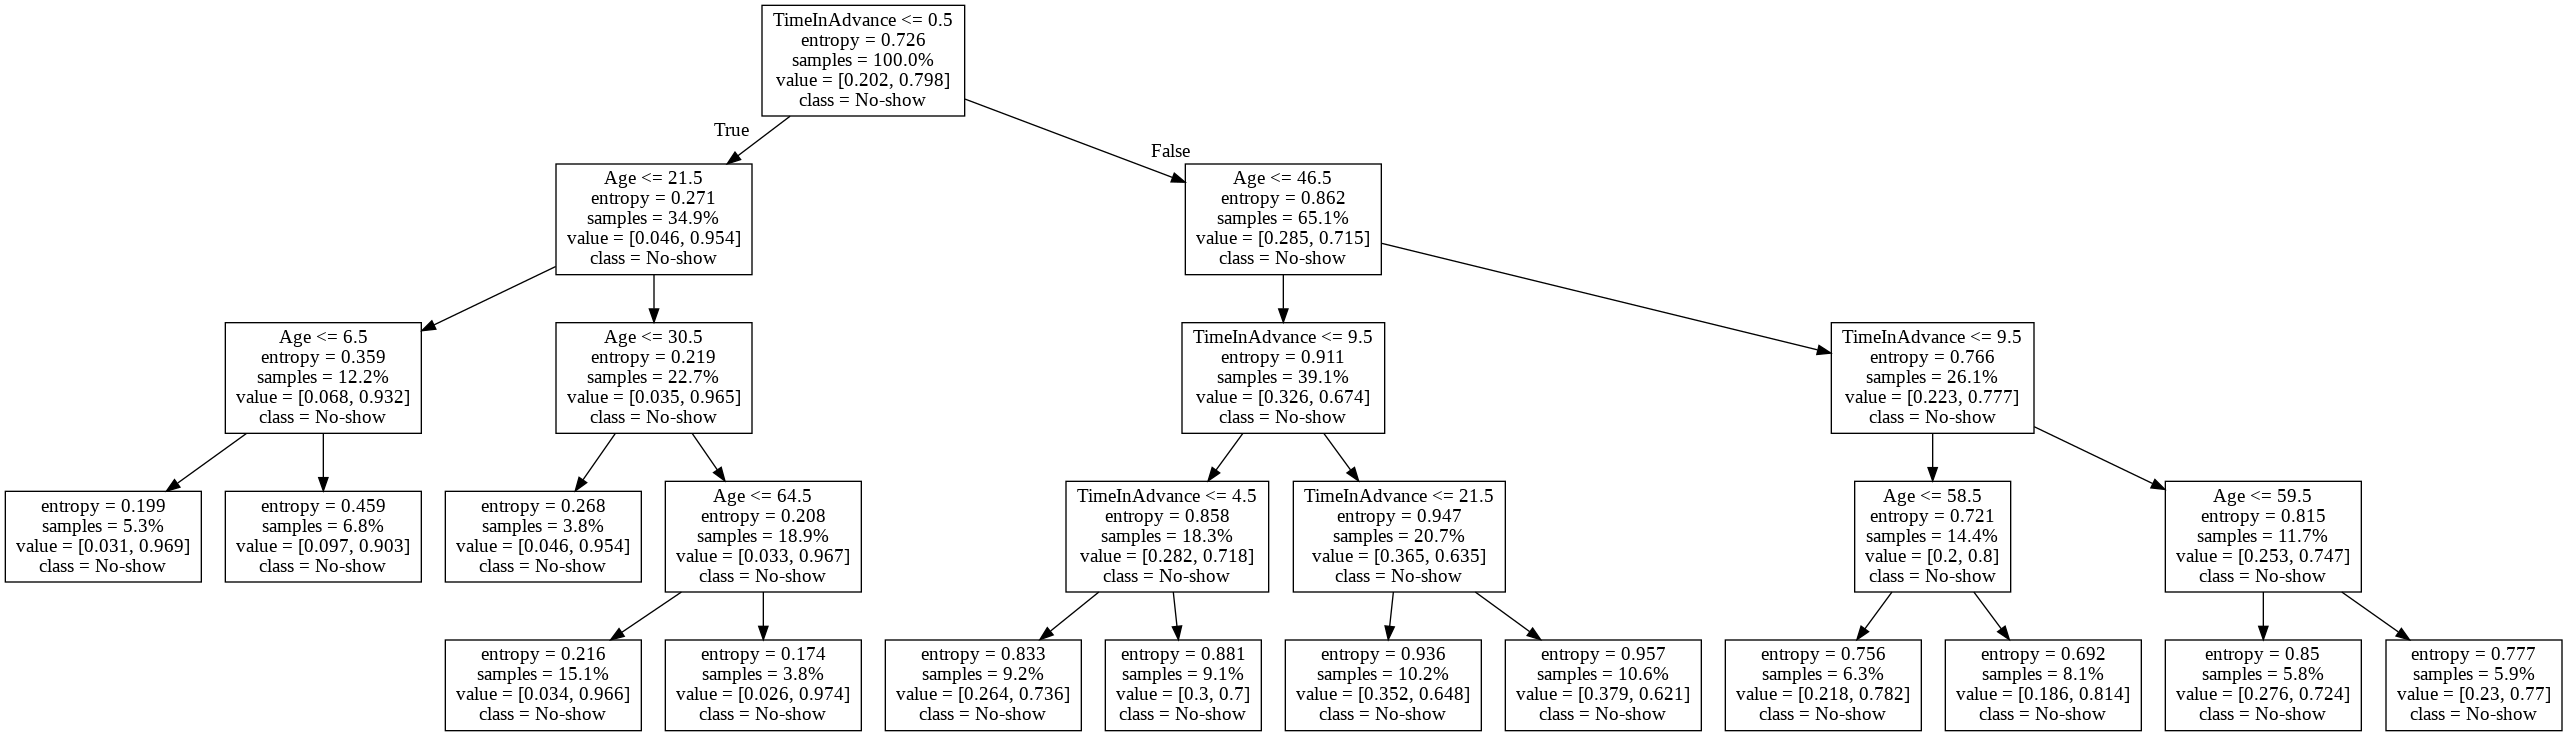

In [78]:
visualize_tree(decision_tree, predictor_cols, ["Show", "No-show"])

** 17. (Optional, extra points) Do you think the accuracy of the model you built is good or not? Why? What other addititonal information would be useful to evaluate whether the model is any good? How would you use that information to evaluate the model? **

In [79]:
# Put your (optional) answer here (use 'markdown' rather than 'code').
from sklearn import metrics
print ( "Accuracy = %.2f" % (metrics.accuracy_score(decision_tree.predict(df[predictor_cols]), df_2["No-show"])) )

Accuracy = 0.80


15. Let's build a model to predict if someone will not show up using a LogisticRegression. Report the training accuracy.

In [80]:
# Put your answer here
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

logit_model = linear_model.LogisticRegression()
logit_model.fit(X=df_2[predictor_cols], y=df_2[target_col])
# Decision_Surface(df, "fare", "age", df.survived, logit_model, False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
from sklearn import metrics
print ( "Accuracy = %.2f" % (metrics.accuracy_score(logit_model.predict(df_2[predictor_cols]), df_2[target_col])) )

Accuracy = 0.79


16. (Optional, extra points) Do you think the accuracy of the model you built is good or not? Why? What other addititonal information would be useful to evaluate whether the model is any good? How would you use that information to evaluate the model?

In [82]:
# I think that the accuracy is good but it can be better. Maybe woorking with with so many variable can create a problem instead on being a solution. Therefore, maybe a model with less variable could be more precise without overfiting.